# Filippo Conforto - RLab 04

In [24]:
library(tidyverse, quiet = TRUE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Exercise 1

Since the survey allows only two possibilities (success or failure) the distribution must be a binomial one with as parameter the probability to find a person that has read the journal.

The likelyhood function after 150 attempts and 29 successes is the same binomial function with the dependence over the probability parameter

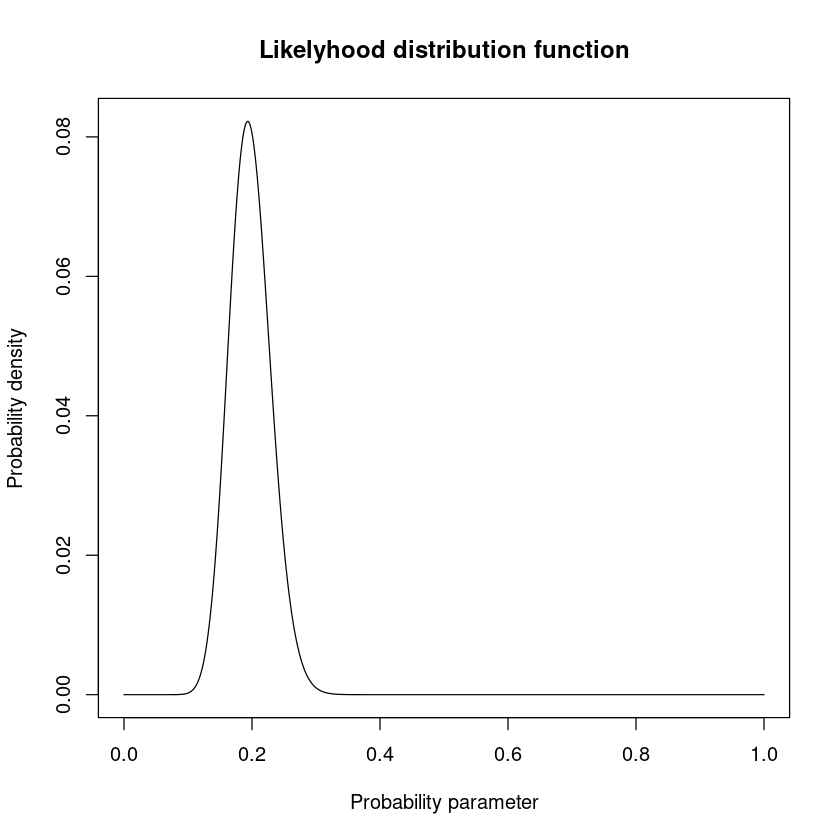

In [6]:
plot(seq(0,1,0.001),dbinom(29,size = 150, prob = seq(0,1,0.001)), xlab = "Probability parameter", ylab = "Probability density", t="l", main = "Likelyhood distribution")

Since from bayesian theory the posterior is obtained as ... with a uniform posterior the only difference with the likelyhood is the normalization factor

In [9]:
post_norm = integrate(function (x) dbinom(29,size = 150, prob = x), 0, 1)[[1]]

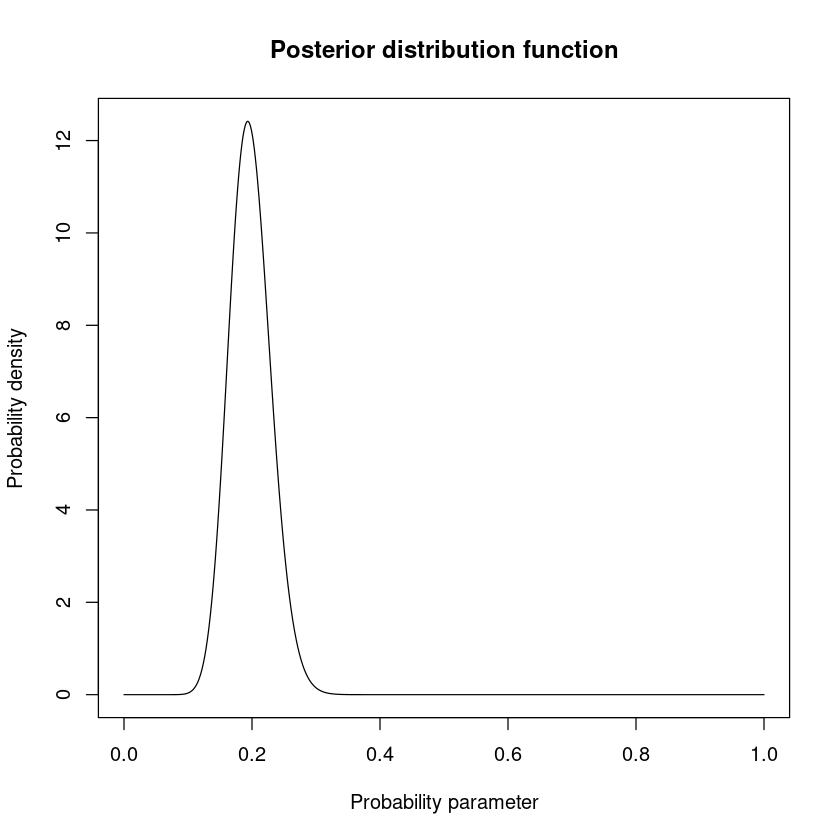

In [10]:
plot(seq(0,1,0.001),dbinom(29,size = 150, prob = seq(0,1,0.001))/post_norm, xlab = "Probability parameter", ylab = "Probability density", t="l", main = "Posterior distribution")

## Exercise 2

Again, we assume for the model a binomial distribution. The parameter over which we will do inference is  probability to have a success.

The first prior is simply the beta function with the parameters alfa and beta obtained from the mean and std as

In [13]:
prior1 = dbeta
alfa = ((1-0.2)/0.08^2-1/0.2)*0.2^2
beta = alfa*(1/0.2 - 1)

The second prior is the uniform function with fixed bounds

In [14]:
prior2 = function(x) dunif(x,min=0,max=1)

The third prior needs to be implemented 

In [25]:
prior3 = function(x) {case_when(
    (x<0.1) & (x>=0) ~ 20*x/0.7,
    (x<0.3) & (x>=0.1) ~ 2/0.7,
    (x<0.5) & (x>=0.3) ~ 5/0.7-10*x/0.7,
    x>=0.5 ~ 0
)}

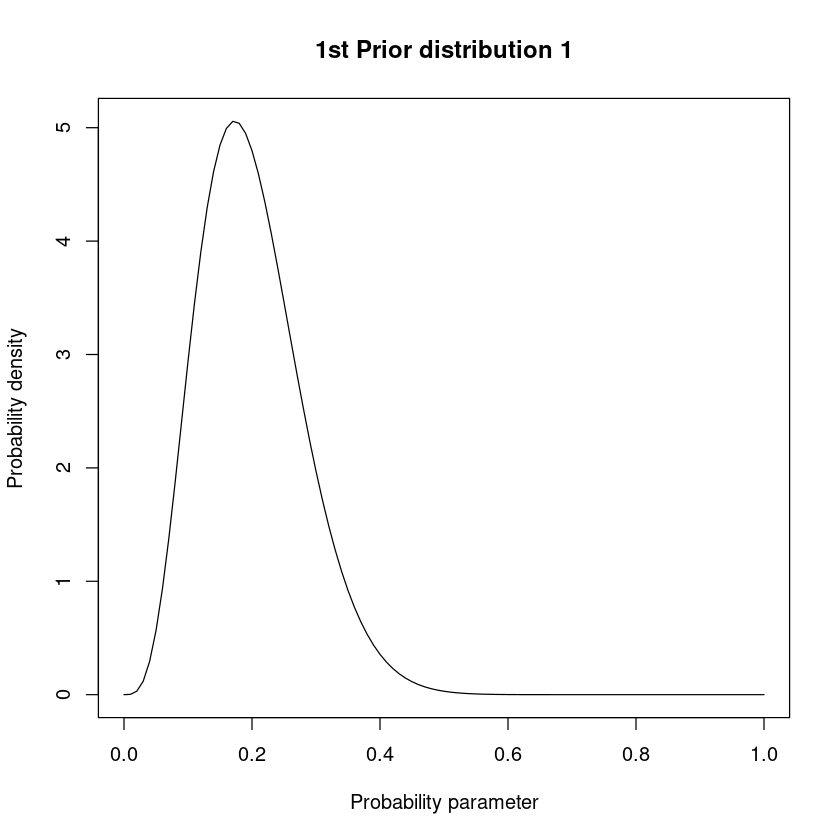

In [18]:
plot(seq(0,1,0.01),prior1(seq(0,1,0.01),shape1 = alfa, shape2 = beta), xlab = "Probability parameter", ylab = "Probability density", t="l", main = "1st Prior distribution ")

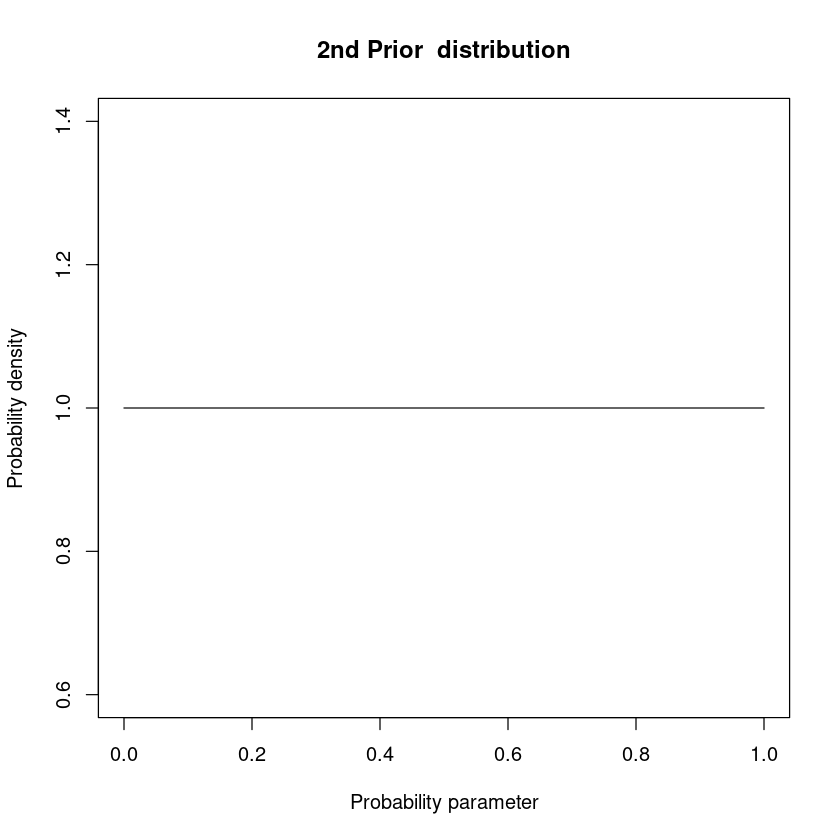

In [19]:
plot(seq(0,1,0.01),prior2(seq(0,1,0.01)), xlab = "Probability parameter", ylab = "Probability density", t="l", main = "2nd Prior distribution")

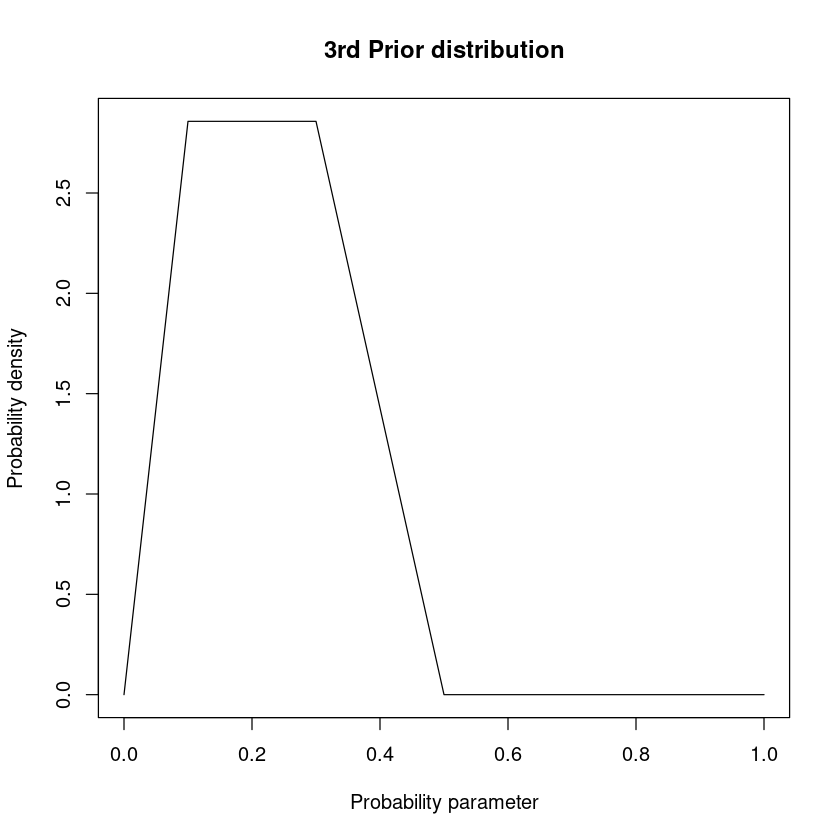

In [26]:
plot(seq(0,1,0.01),prior3(seq(0,1,0.01)),xlab = "Probability parameter", ylab = "Probability density", t="l", main = "3rd Prior distribution")

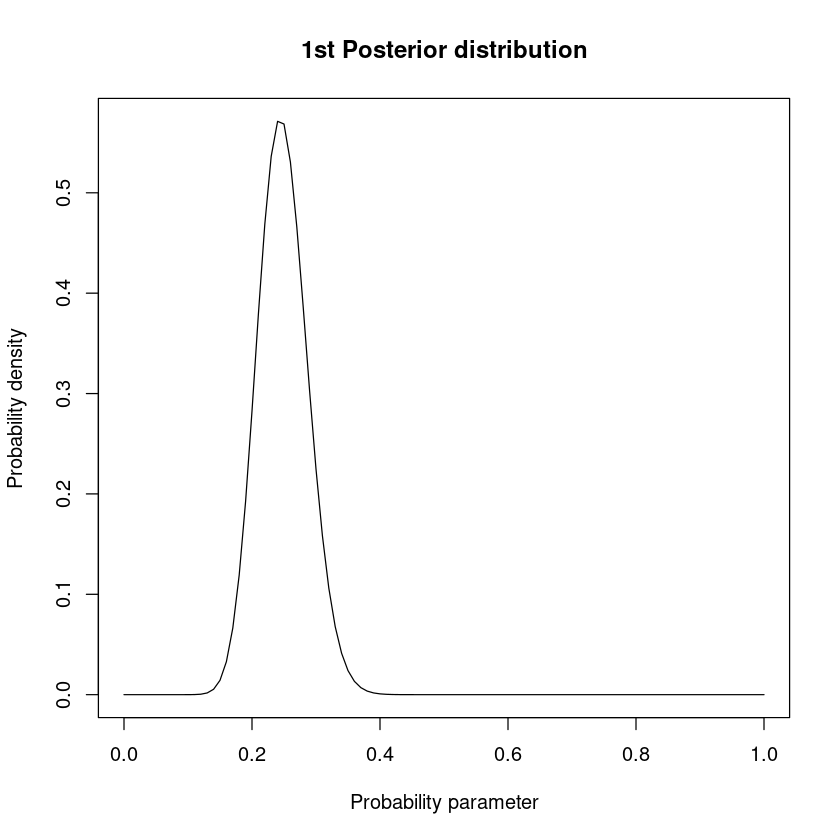

In [30]:
posterior1 = function(x){
    dbinom(26,size = 100, prob = x)*prior1(x,shape1 = alfa, shape2 = beta)/integrate(function(x) dbinom(26,size = 100, prob = x)**prior1(x,shape1 = alfa, shape2 = beta),0,1)[[1]]
}
plot(seq(0,1,0.01),posterior1(seq(0,1,0.01)),xlab = "Probability parameter", ylab = "Probability density", t="l", main = "1st Posterior distribution")

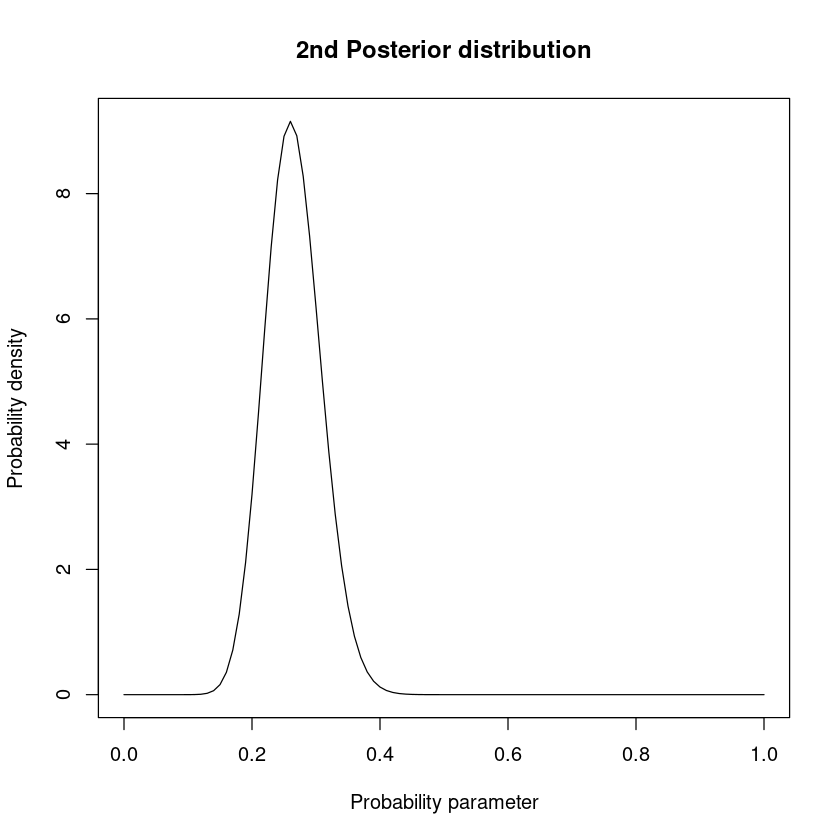

In [32]:
posterior2 = function(x){
    dbinom(26,size = 100, prob = x)*prior2(x)/integrate(function(x) dbinom(26,size = 100, prob = x)*prior2(x),0,1)[[1]]
}
plot(seq(0,1,0.01),posterior2(seq(0,1,0.01)),xlab = "Probability parameter", ylab = "Probability density", t="l", main = "2nd Posterior distribution")

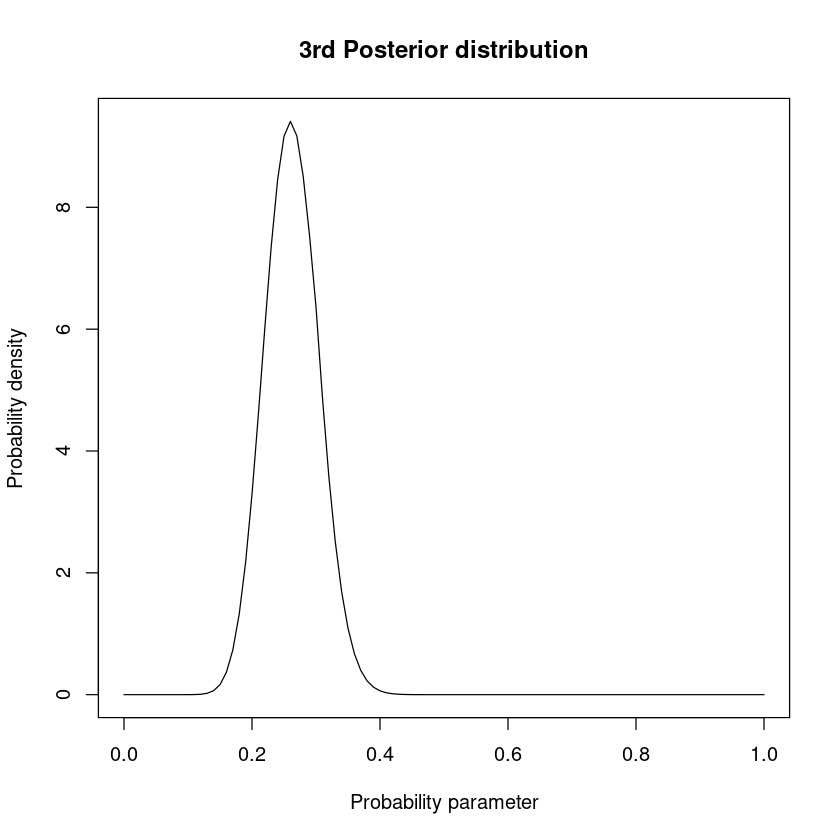

In [33]:
posterior3 = function(x){
    dbinom(26,size = 100, prob = x)*prior3(x)/integrate(function(x) dbinom(26,size = 100, prob = x)*prior3(x),0,1)[[1]]
}
plot(seq(0,1,0.01),posterior3(seq(0,1,0.01)),xlab = "Probability parameter", ylab = "Probability density", t="l", main = "3rd Posterior distribution")

The most probable value is obtained as the one for which the density is maximum. Is estimated numerically by calculating the posterior over a very dense grid.

In [41]:
message("The best value for the first posterior is ",(which.max(posterior1(seq(0,1,0.000001)))-1)*0.000001)

The best value for the first posterior is 0.244262



In [42]:
message("The best value for the second posterior is ",(which.max(posterior2(seq(0,1,0.000001)))-1)*0.000001)

The best value for the second posterior is 0.26



In [43]:
message("The best value for the third posterior is ",(which.max(posterior3(seq(0,1,0.000001)))-1)*0.000001)

The best value for the third posterior is 0.26



The confidence interval bounds can be obtained numerically using `uniroot()`, and having .

In [44]:
find_ci95 = function (pos) {
    low = uniroot(function(y){integrate(pos,0,y)[[1]] - 0.025}, lower = 0, upper = 1)$root
    up = uniroot(function(y){integrate(pos,y,1)[[1]] - 0.025}, lower = 0, upper = 1)$root
    return(c(low,up))
}

In [54]:
s_dec <- function(x, k) trimws(format(round(x, k), nsmall=k))

In [56]:
message("The confidence interval for the first posterior is [",s_dec(find_ci95(posterior1)[[1]], 2),",",s_dec(find_ci95(posterior1)[[2]],2),"]")

The confidence interval for the first posterior is [0.24,0.25]



In [57]:
message("The confidence interval for the first posterior is [",s_dec(find_ci95(posterior2)[[1]], 2),",",s_dec(find_ci95(posterior2)[[2]],2),"]")

The confidence interval for the first posterior is [0.18,0.35]



In [58]:
message("The confidence interval for the first posterior is [",s_dec(find_ci95(posterior3)[[1]], 2),",",s_dec(find_ci95(posterior3)[[2]],2),"]")

The confidence interval for the first posterior is [0.18,0.35]



## Exercise 3

The serie of draws need to be translated into a binary representation in order do inference.

In [62]:
H = 1
T = 0
draws = c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H,H, H)

Again, since the model is a simple binomial, the result is obtained by calculating the posterior distribution over the probability parameter.

Assuming that the coin is fair is useful to define a prior with 0.5 mean, while the variance can be fixed 0.05.

In [73]:
prior1 = dbeta
alfa = ((1-0.5)/0.05-1/0.5)*0.5^2
beta = alfa*(1/0.5 - 1)

The second prior is the uniform function with fixed bounds

In [74]:
prior2 = function(x) dunif(x,min=0,max=1)

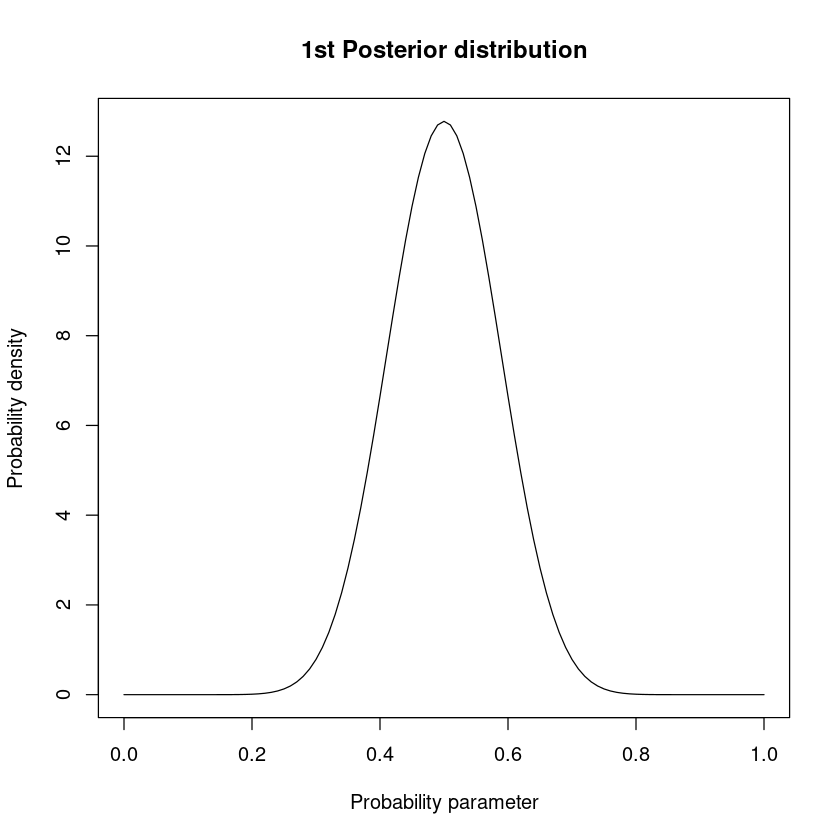

In [84]:
posterior1 = function(x,step = length(draws)){
    dbinom(sum(draws[1:step]),size = step, prob = x)*prior1(x,shape1 = alfa, shape2 = beta)/integrate(function(x) dbinom(sum(draws[1:step]),size = step, prob = x)**prior1(x,shape1 = alfa, shape2 = beta),0,1)[[1]]
}
plot(seq(0,1,0.01),posterior1(seq(0,1,0.01)),xlab = "Probability parameter", ylab = "Probability density", t="l", main = "1st Posterior distribution")

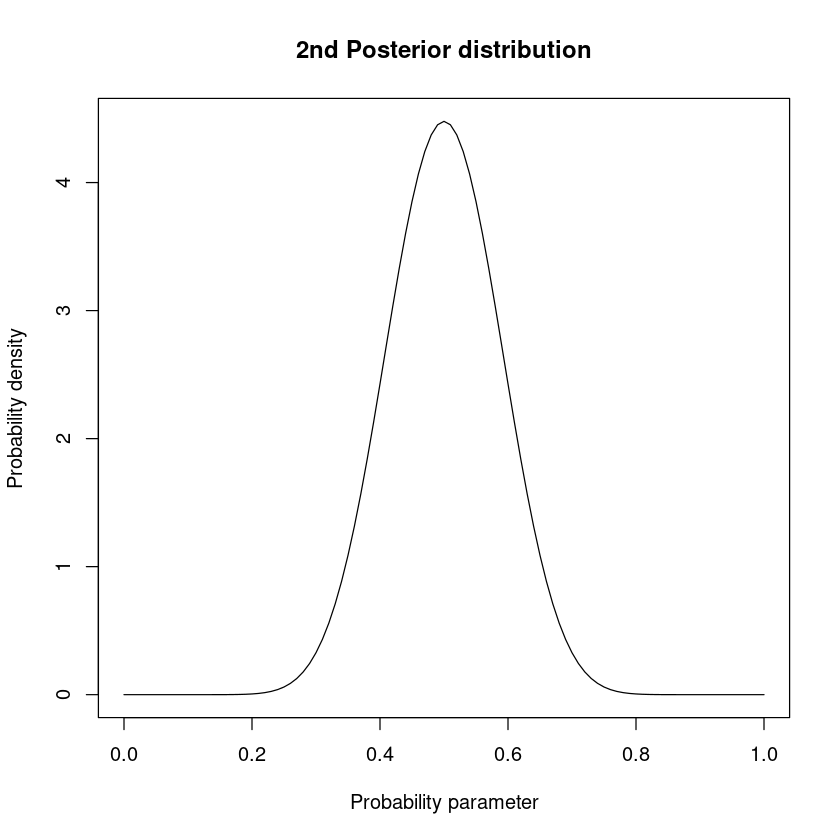

In [85]:
posterior2 = function(x, step = length(draws)){
    dbinom(sum(draws[1:step]),size = step, prob = x)*prior2(x)/integrate(function(x) dbinom(sum(draws[1:step]),size = step, prob = x)*prior2(x),0,1)[[1]]
}
plot(seq(0,1,0.01),posterior2(seq(0,1,0.01)),xlab = "Probability parameter", ylab = "Probability density", t="l", main = "2nd Posterior distribution")

In [78]:
message("The best value for the first posterior is ",(which.max(posterior1(seq(0,1,0.000001)))-1)*0.000001)

The best value for the first posterior is 0.5



In [79]:
message("The best value for the second posterior is ",(which.max(posterior2(seq(0,1,0.000001)))-1)*0.000001)

The best value for the second posterior is 0.5



In [82]:
message("The confidence interval for the first posterior is [",s_dec(find_ci95(posterior1)[[1]], 2),",",s_dec(find_ci95(posterior1)[[2]],2),"]")

The confidence interval for the first posterior is [0.30,0.70]



In [83]:
message("The confidence interval for the second posterior is [",s_dec(find_ci95(posterior2)[[1]], 2),",",s_dec(find_ci95(posterior2)[[2]],2),"]")

The confidence interval for the second posterior is [0.33,0.67]



By changing the step number is possible to see the evolution of the two posteriors.

In [121]:
b_value1 = (sapply(map(1:30,posterior1,x=seq(0,1,0.000001)),which.max)-1)*0.000001

In [95]:
b_value2 = (sapply(map(1:30,posterior2,x=seq(0,1,0.000001)),which.max)-1)*0.000001

Another function is needed in order to compute the evolution for confidence intervals

In [113]:
find_ci95_step = function (pos,step) {
    low = uniroot(function(y){integrate(pos,0,y, step = step)[[1]] - 0.025}, lower = 0, upper = 1)$root
    up = uniroot(function(y){integrate(pos,y,1, step = step)[[1]] - 0.025}, lower = 0, upper = 1)$root
    return(c(low,up))
}

In [158]:
c_value1 = matrix(unlist(map(1:30,find_ci95_step,pos= posterior1)), nrow = 30, ncol =2, byrow = TRUE)

In [160]:
c_value2 = matrix(unlist(map(1:30,find_ci95_step,pos= posterior2)), nrow = 30, ncol =2, byrow = TRUE)

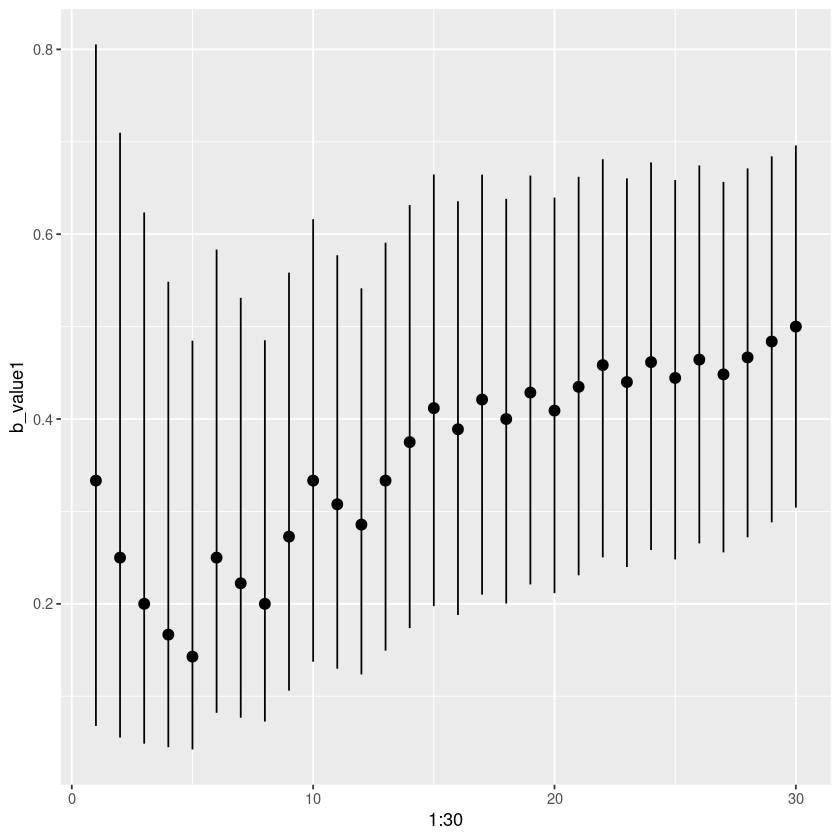

In [171]:
ggplot() + 
    geom_pointrange(aes(x= 1:30, y= b_value1,ymin=c_value1[,1], ymax=c_value1[,2]))

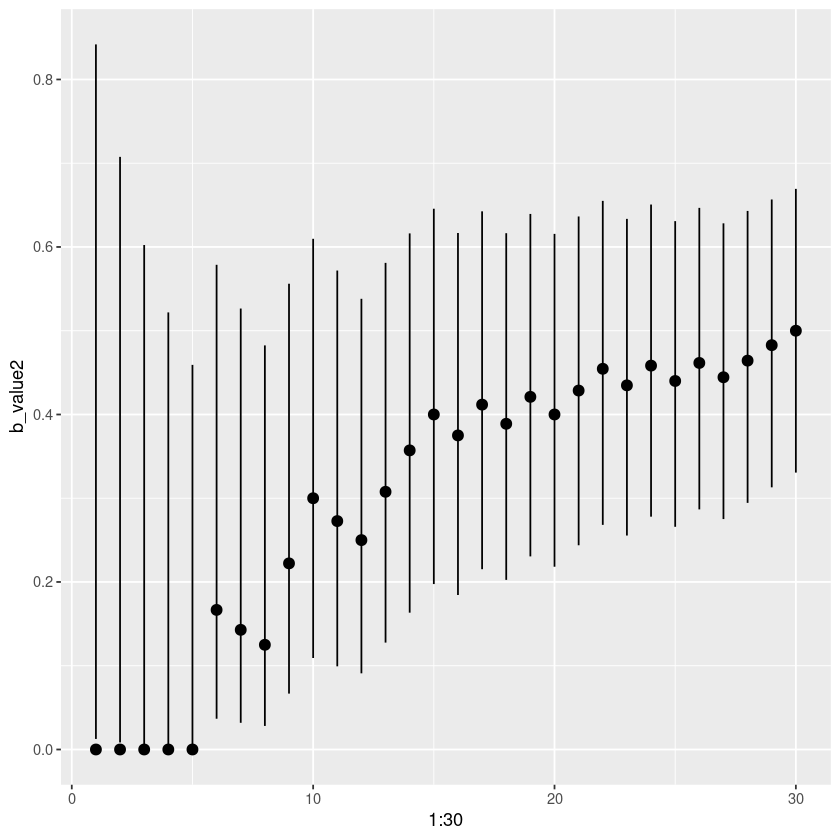

In [172]:
ggplot() + 
    geom_pointrange(aes(x= 1:30, y= b_value2,ymin=c_value2[,1], ymax=c_value2[,2]))